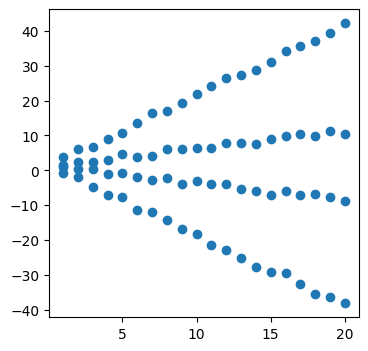

In [20]:
#Generating Data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X= np.array([[1,1.09730308441996],[2,2.43586442272545],[3,2.51116299518401],[4,3.03145539594202],[5,4.66664558877809],[6,3.93408456237042],[7,4.24949659312207],[8,6.20150698271801],[9,6.0717780921866],[10,6.26207315055509],[11,6.49586031797784],[12,7.83670100450654],[13,7.90940408673268],[14,7.64469311768879],[15,8.89462008041086],[16,9.78581223975706],[17,10.4556971391132],[18,9.96049095897342],[19,11.1624287278672],[20,10.4761409095033],[1,1.49645352156891],[2,0.386184701314561],[3,0.342639809355713],[4,-1.05240216629817],[5,-0.701740034637582],[6,-1.80026023417071],[7,-2.65310956496503],[8,-2.22901684720051],[9,-3.89566166009949],[10,-3.01016219363794],[11,-3.94613234180612],[12,-3.8858810837492],[13,-5.33174700485745],[14,-5.80441119639406],[15,-7.08279750222182],[16,-5.82853344603204],[17,-7.15756850228727],[18,-6.87082516687969],[19,-7.59311859408972],[20,-8.78511708923856],[1,3.77667823156857],[2,6.0743178686243],[3,6.76144670933566],[4,9.0193124434231],[5,10.7433356695474],[6,13.7056797616544],[7,16.2995356695637],[8,16.9272746711059],[9,19.1843689223608],[10,21.9390370354661],[11,24.2768927653876],[12,26.5418178220348],[13,27.2271960416962],[14,28.696383257999],[15,31.1041398803967],[16,34.1897421296044],[17,35.6038191352245],[18,37.2067736609178],[19,39.4470247254049],[20,42.1623526714938],[1,-0.664424941363579],[2,-1.78385945533055],[3,-4.84248894780797],[4,-7.18983262066937],[5,-7.61612120451894],[6,-11.4509236493259],[7,-11.9746140324827],[8,-14.2595170068448],[9,-16.9500700011744],[10,-18.3340175444392],[11,-21.4146247097464],[12,-22.8957674212245],[13,-25.2454461975581],[14,-27.5977188400436],[15,-29.1505799048792],[16,-29.5133464245803],[17,-32.4484765820864],[18,-35.3814788479149],[19,-36.1894299953562],[20,-38.118746586956]])

plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1])
plt.show()

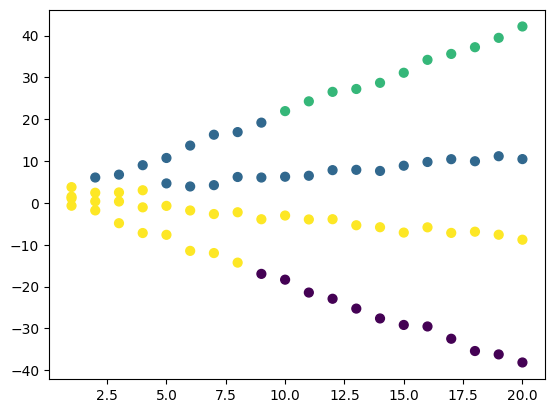

In [21]:
#Applying K-Means:
from sklearn.cluster import KMeans
kmm = KMeans(n_clusters=4)
kmm.fit(X)
labels = kmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')
plt.show()

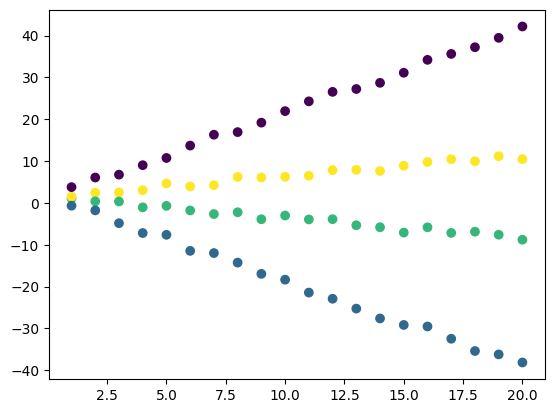

In [22]:
#GMM:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.show()

In [23]:
gmm.means_

array([[ 10.49913536,  22.54238217],
       [ 10.49478913, -19.63875649],
       [ 10.4301911 ,  -3.74700896],
       [ 10.57702358,   6.61027241]])

In [24]:
gmm.covariances_

array([[[ 33.25518755,  66.91583054],
        [ 66.91583054, 134.97294109]],

       [[ 33.28135609, -66.78934254],
        [-66.78934254, 134.44006968]],

       [[ 33.66391767, -16.62144929],
        [-16.62144929,   8.46091767]],

       [[ 32.78187379,  16.43894455],
        [ 16.43894455,   8.48764308]]])

In [25]:
gmm.weights_

array([0.25002276, 0.25013695, 0.25185082, 0.24798948])

In [28]:
#Predicting probability:
probs = gmm.predict_proba(X)
probs[0,:]
probs = probs.round(3)
print(probs)


[[0.    0.018 0.722 0.259]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.002 0.003 0.394 0.6  ]
 [0.    0.    0.999 0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 

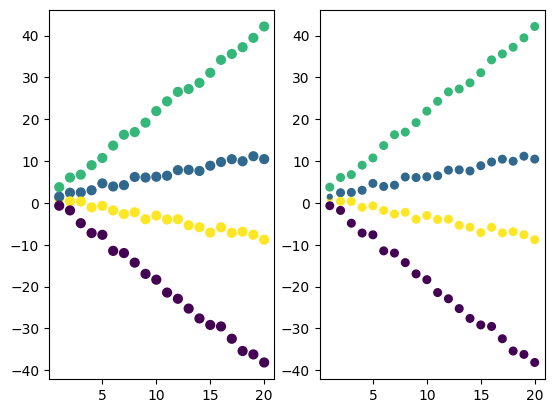

In [8]:
# We can also visualize the effect of these probabilities:
size = 30 * probs.max(1) ** 2  # square emphasizes differences
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)
plt.show()

In [9]:
#VIsualization Ellipse:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

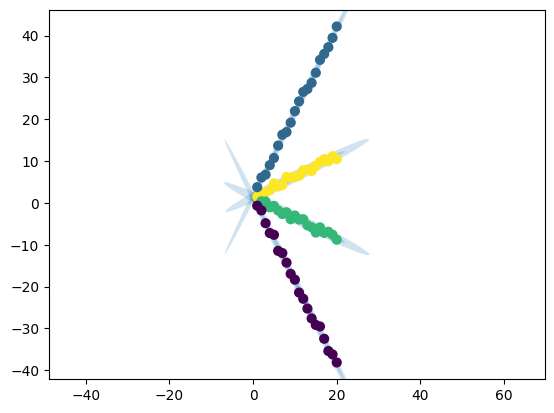

In [29]:
# For creating some circles around the center of each cluster within the visualizations
from scipy.spatial.distance import cdist
# For creating some circles for probability area around the center of each cluster within the visualizations
from matplotlib.patches import Ellipse
gmm = GaussianMixture(n_components=4)
plot_gmm(gmm, X)
plt.show()

In [30]:
#Looking for parameters:
gmm.means_

array([[ 10.49478913, -19.63875649],
       [ 10.49913536,  22.54238217],
       [ 10.4301911 ,  -3.74700896],
       [ 10.57702358,   6.61027241]])

In [12]:
gmm.weights_

array([0.25185082, 0.25002276, 0.25013695, 0.24798948])

In [13]:
gmm.covariances_

array([[[ 33.66391767, -16.62144929],
        [-16.62144929,   8.46091767]],

       [[ 33.25518755,  66.91583054],
        [ 66.91583054, 134.97294109]],

       [[ 33.28135609, -66.78934254],
        [-66.78934254, 134.44006968]],

       [[ 32.78187379,  16.43894455],
        [ 16.43894455,   8.48764308]]])

In [14]:
#AIC and BIC for determining Optimal K:
Sum_bic = []
Sum_aic = []

K = range(1,8)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm = gmm.fit(X)
    Sum_bic.append(gmm.bic(X))
    Sum_aic.append(gmm.aic(X))

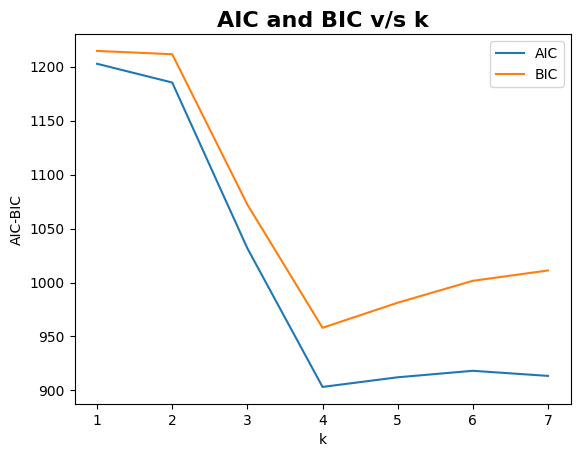

In [15]:
x1 = K
y1 = Sum_aic
plt.plot(x1, y1, label = "AIC")
x2 = K
y2 = Sum_bic
plt.plot(x2, y2, label = "BIC")

plt.title("AIC and BIC v/s k", fontsize=16, fontweight='bold')
plt.xlabel("k")
plt.ylabel("AIC-BIC")
plt.legend(loc='upper right')
plt.show()